In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA/Traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [4]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [5]:
df.shape

(2976, 9)

In [6]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [7]:
# Mengubah tipe data Time menjadi float
df['Time'] = pd.to_datetime(df['Time']).dt.hour * 60 + pd.to_datetime(df['Time']).dt.minute
df['Time'] = df['Time'] / 60.0
df.head()

<ipython-input-7-d7d005ddaa95>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour * 60 + pd.to_datetime(df['Time']).dt.minute
<ipython-input-7-d7d005ddaa95>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour * 60 + pd.to_datetime(df['Time']).dt.minute


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.00,10,Tuesday,31,0,4,4,39,low
1,0.25,10,Tuesday,49,0,3,3,55,low
2,0.50,10,Tuesday,46,0,3,6,55,low
3,0.75,10,Tuesday,51,0,2,5,58,low
4,1.00,10,Tuesday,57,6,15,16,94,normal


In [8]:
# Mengelompokkan berdasarkan Day of the week
grouped_df = df.groupby("Day of the week")[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]].describe()

# Menampilkan hasil
print(grouped_df)

                CarCount                                                   \
                   count       mean        std   min    25%   50%     75%   
Day of the week                                                             
Friday             384.0  68.953125  54.638168  10.0  20.00  53.5  100.25   
Monday             384.0  67.429688  44.132311   6.0  19.00  64.5  106.00   
Saturday           384.0  68.869792  44.828641   9.0  19.00  67.0  107.25   
Sunday             384.0  67.890625  43.675381   7.0  19.00  66.0  106.00   
Thursday           480.0  68.133333  45.603343   7.0  18.00  62.5  107.00   
Tuesday            480.0  69.637500  43.489997   6.0  22.75  66.0  108.00   
Wednesday          480.0  69.633333  44.783578   6.0  19.75  70.0  108.00   

                       BikeCount             ... TruckCount        Total  \
                   max     count       mean  ...        75%   max  count   
Day of the week                              ...                           
F

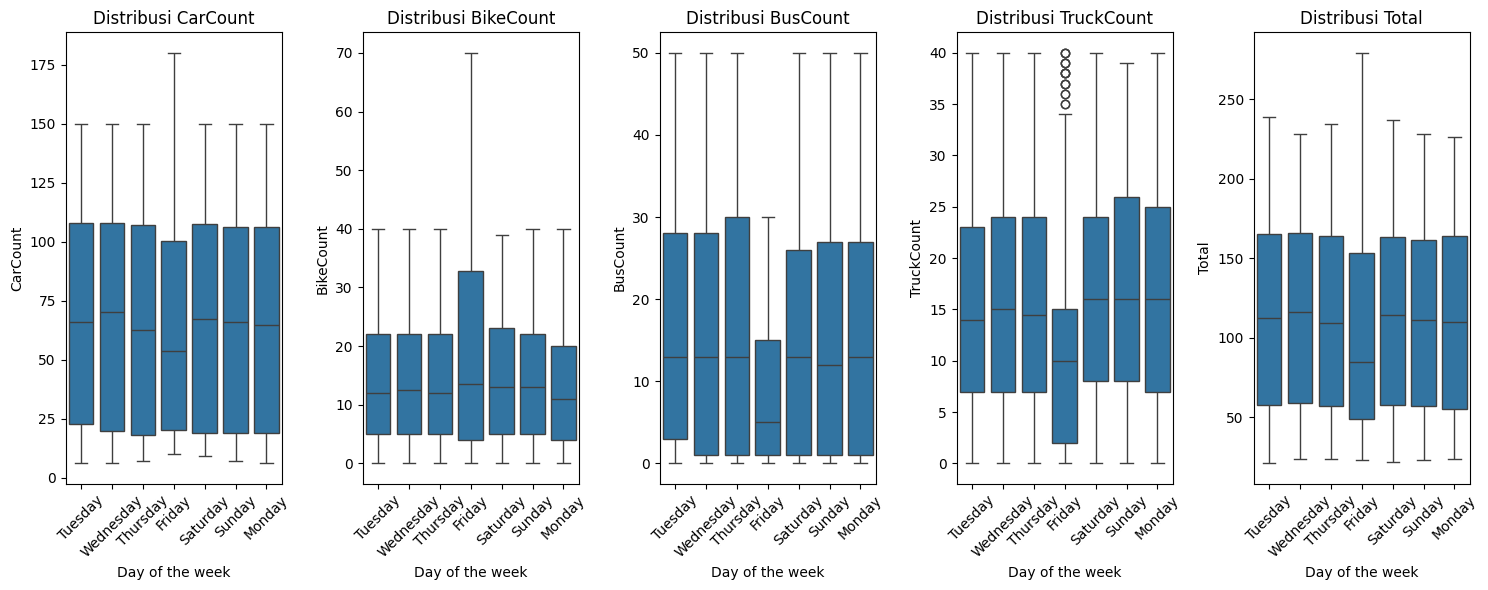

In [9]:
# Set ukuran figure
plt.figure(figsize=(15, 6))

# List kolom yang ingin dianalisis
columns = ["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]

# Loop untuk membuat boxplot tiap kolom
for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df["Day of the week"], y=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

In [12]:
# plt.figure(figsize=(12, 8))

# for col in columns:
#     sns.histplot(df, x=col, hue="Day of the week", kde=True, element="step", multiple="stack")

# plt.legend(title="Day of the week")
# plt.show()

<ipython-input-10-a1c431dc4130>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].mean().reset_index()


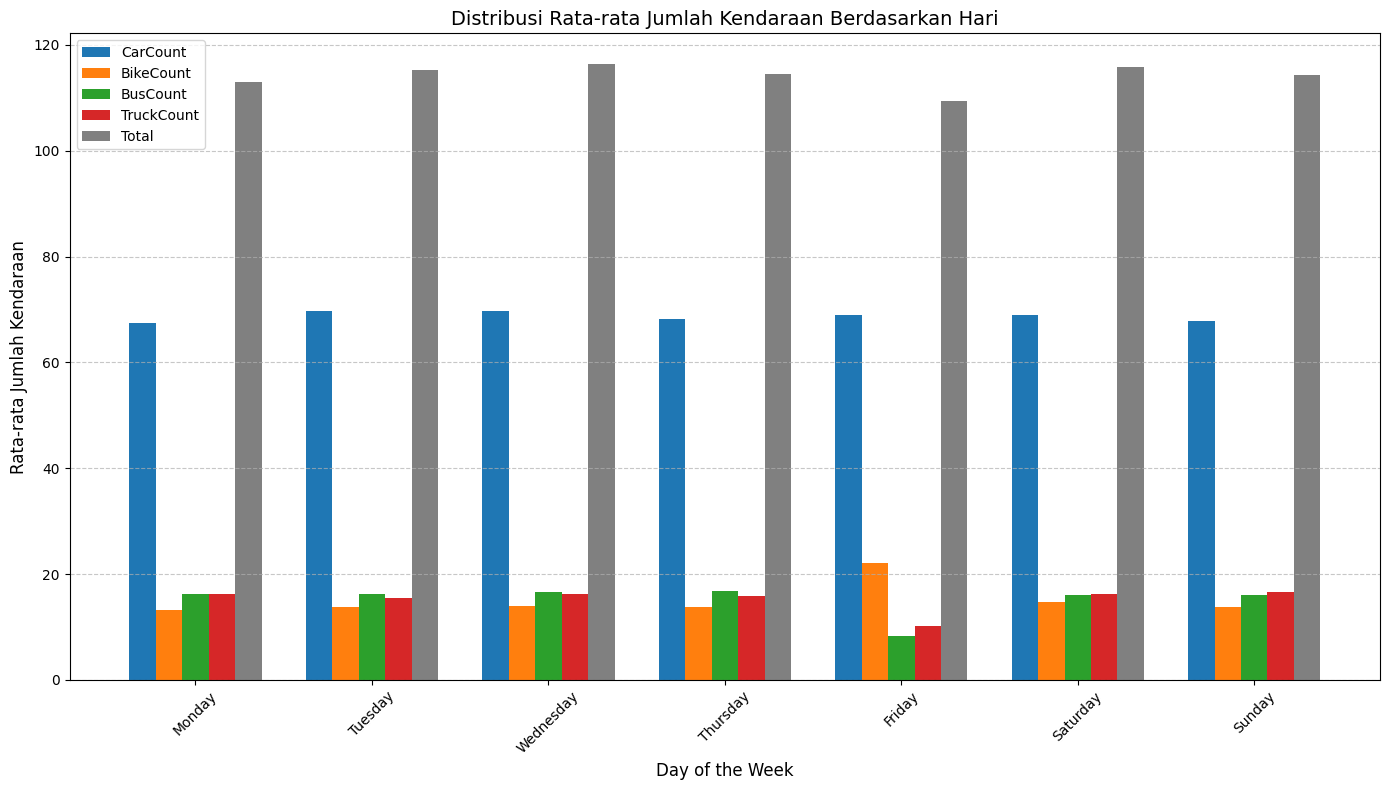

In [10]:
from pandas.api.types import CategoricalDtype

# Menentukan urutan hari dalam seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=day_order, ordered=True)

# Mengubah kolom 'Day of the week' menjadi kategori dengan urutan yang benar
df['Day of the week'] = df['Day of the week'].astype(day_type)

# Mengelompokkan data berdasarkan 'Day of the week' dan menghitung rata-rata
grouped_data = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.15
days = grouped_data['Day of the week']
x = range(len(days))

plt.bar([p - 2 * bar_width for p in x], grouped_data['CarCount'], width=bar_width, label='CarCount')
plt.bar([p - bar_width for p in x], grouped_data['BikeCount'], width=bar_width, label='BikeCount')
plt.bar(x, grouped_data['BusCount'], width=bar_width, label='BusCount')
plt.bar([p + bar_width for p in x], grouped_data['TruckCount'], width=bar_width, label='TruckCount')
plt.bar([p + 2 * bar_width for p in x], grouped_data['Total'], width=bar_width, label='Total', color='gray')

# Mengatur label dan judul
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Rata-rata Jumlah Kendaraan', fontsize=12)
plt.title('Distribusi Rata-rata Jumlah Kendaraan Berdasarkan Hari', fontsize=14)
plt.xticks(x, days, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [11]:
encoder = LabelEncoder()

df["Day of the week"] = encoder.fit_transform(df["Day of the week"])
df["Traffic Situation"] = encoder.fit_transform(df["Traffic Situation"])
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.00,10,5,31,0,4,4,39,2
1,0.25,10,5,49,0,3,3,55,2
2,0.50,10,5,46,0,3,6,55,2
3,0.75,10,5,51,0,2,5,58,2
4,1.00,10,5,57,6,15,16,94,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   float64
 1   Date               2976 non-null   int64  
 2   Day of the week    2976 non-null   int64  
 3   CarCount           2976 non-null   int64  
 4   BikeCount          2976 non-null   int64  
 5   BusCount           2976 non-null   int64  
 6   TruckCount         2976 non-null   int64  
 7   Total              2976 non-null   int64  
 8   Traffic Situation  2976 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 209.4 KB


In [13]:
df['Traffic Situation'].unique()

array([2, 3, 0, 1])

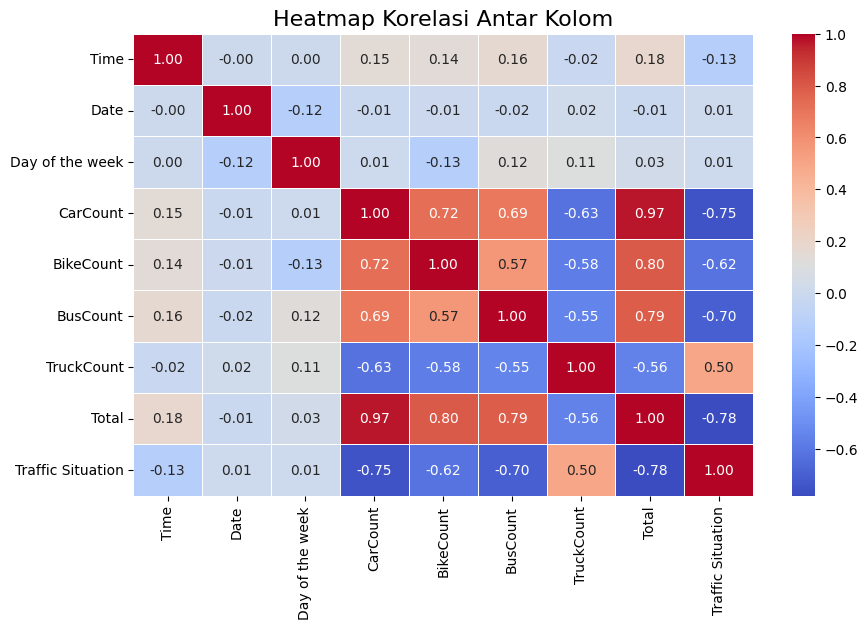

In [15]:
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom', fontsize=16)
plt.show()

In [16]:
# Menghapus kolom 'Time', 'Date', dan 'Day of the week' karena tidak berpengaruh
df.drop(columns=['Time', 'Date', 'Day of the week'], inplace=True)

# Cek dataframe setelah kolom 'Date' dihapus
df.head()

,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,31,0,4,4,39,2
1,49,0,3,3,55,2
2,46,0,3,6,55,2
3,51,0,2,5,58,2
4,57,6,15,16,94,3


## Split Data

In [17]:
# Fitur dan target
X = df.drop("Traffic Situation", axis=1)
y = df["Traffic Situation"]
print(len(X))
print(len(y))

2976
2976


In [18]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2380
596
2380
596


## Model Decision Tree

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

In [21]:
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



## Random Forest

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [24]:
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      1.00      0.99       596
weighted avg       0.99      0.99      0.99       596



<ipython-input-25-39fb746627c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf, y=features, palette='viridis')


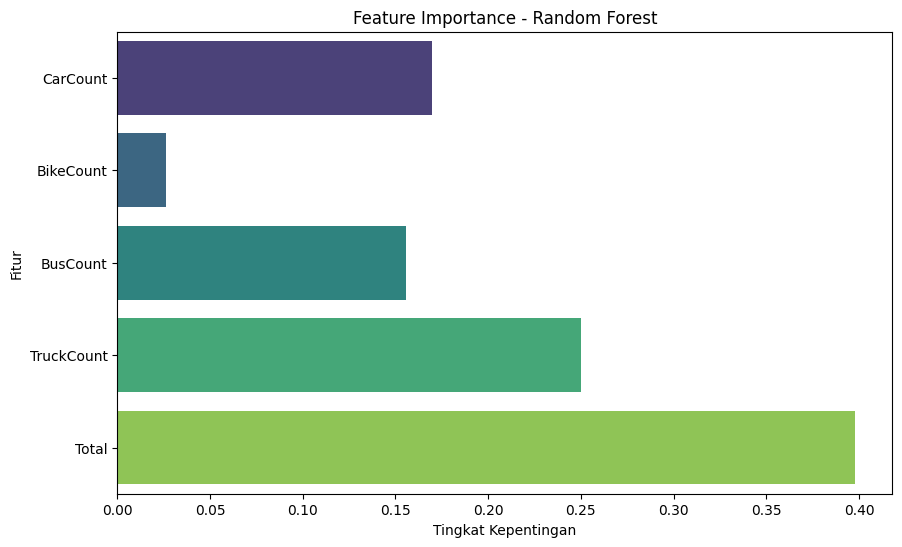

In [25]:
importances_rf = rf_model.feature_importances_
features = df.drop(columns=['Traffic Situation']).columns

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=features, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()

## XGBoost

In [26]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

In [28]:
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



<Figure size 1000x600 with 0 Axes>

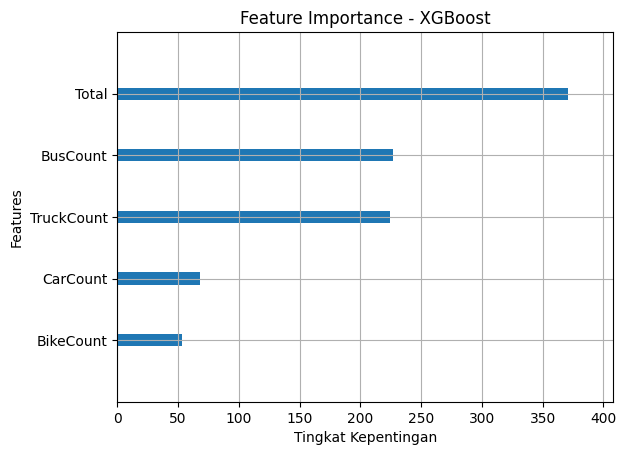

In [29]:
from xgboost import plot_importance

# Visualisasi importance fitur dari XGBoost
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', xlabel='Tingkat Kepentingan', show_values=False)
plt.title('Feature Importance - XGBoost')
plt.show()

## Perbandingan Hasil

In [30]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_dt, acc_rf, acc_xgb]
})
# print(results.sort_values(by='Accuracy', ascending=False))
results

,Model,Accuracy
0,Decision Tree,1.000000
1,Random Forest,0.993289
2,XGBoost,1.000000


In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Input interaktif di Google Colab
# Time = float(input("Masukkan waktu (format jam desimal, contoh 10.5 untuk 10:30 AM): "))
# Date = int(input("Masukkan tanggal (1-31): "))
# Day_of_week = input("Masukkan hari (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday): ")
CarCount = int(input("Masukkan jumlah mobil: "))
BikeCount = int(input("Masukkan jumlah sepeda: "))
BusCount = int(input("Masukkan jumlah bus: "))
TruckCount = int(input("Masukkan jumlah truk: "))

Total = CarCount + BikeCount + BusCount + TruckCount
print(f"\n🔢 Total kendaraan: {Total}")

# Melakukan encoding untuk kolom Day of the week
# day_encoder = LabelEncoder()
# day_encoder.fit(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# encoded_day = day_encoder.transform([Day_of_week])[0]

# Membuat DataFrame dari input
data_baru = pd.DataFrame({
    # 'Time': [Time],
    # 'Date': [Date],
    # 'Day of the week': [encoded_day],
    'CarCount': [CarCount],
    'BikeCount': [BikeCount],
    'BusCount': [BusCount],
    'TruckCount': [TruckCount],
    'Total': [Total]
})

# Prediksi menggunakan model Decision Tree
hasil_prediksi_encoded = dt_model.predict(data_baru)
hasil_prediksi = encoder.inverse_transform(hasil_prediksi_encoded)

# Menampilkan hasil prediksi
print(f"\n📈 Prediksi Situasi Lalu Lintas: {hasil_prediksi[0]}")

Masukkan jumlah mobil: 10
Masukkan jumlah sepeda: 50
Masukkan jumlah bus: 23
Masukkan jumlah truk: 32

🔢 Total kendaraan: 115

📈 Prediksi Situasi Lalu Lintas: high
